In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import glob as gb
import cv2

In [3]:
train = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'


In [4]:
size = 224
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    train,
    target_size=(size, size),
    batch_size=164,
    class_mode='categorical',
    color_mode='rgb',
    subset='training',
    shuffle=True
)


Found 63282 images belonging to 38 classes.


In [5]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

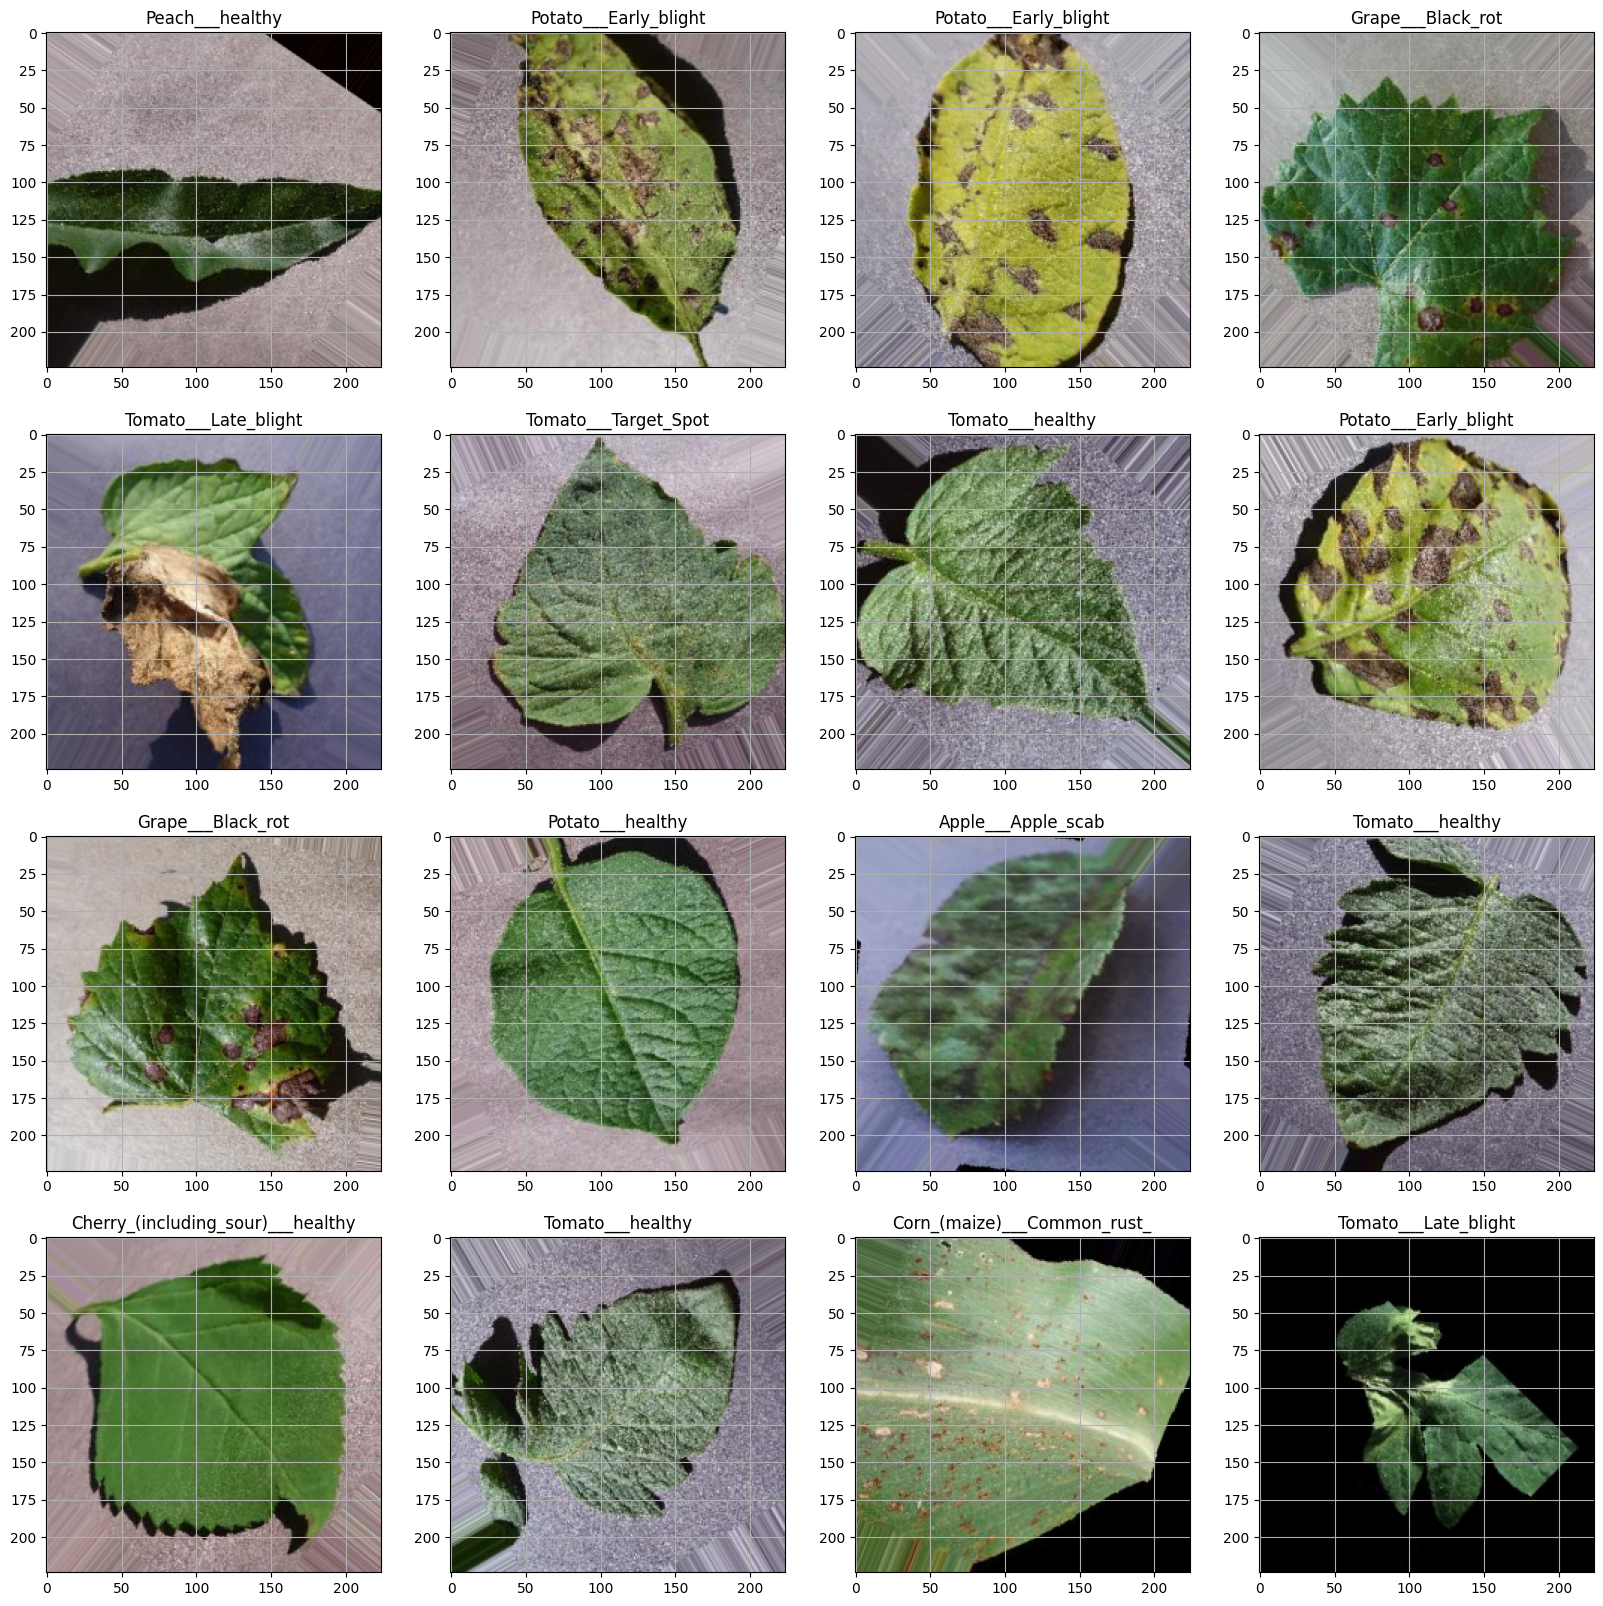

In [6]:
# Display some images
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
  for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_batch[i])
    plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    plt.grid(None)
  plt.show()
  break

In [7]:
valid = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [8]:
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function = None,
    validation_split=0.1
).flow_from_directory(valid,
                      batch_size=164,
                      target_size=(size, size),
                      class_mode='categorical',
                      color_mode='rgb',
                      subset='validation',
                      shuffle=False)

Found 1742 images belonging to 38 classes.


In [9]:
test = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function = None
).flow_from_directory(test,
                      batch_size=164,
                      target_size=(224, 224),
                      color_mode='rgb',
                      class_mode = 'categorical',
                      shuffle = False)

Found 17572 images belonging to 38 classes.


In [10]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

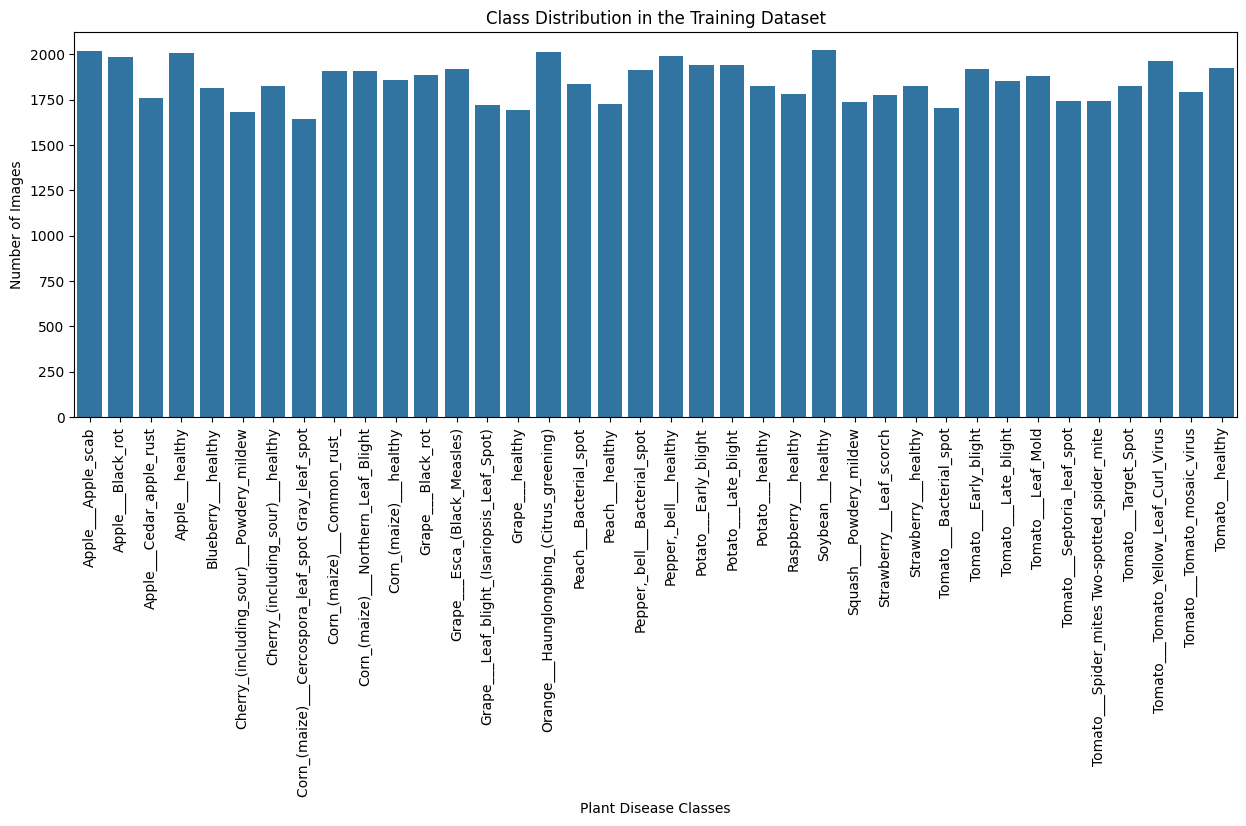

In [11]:
import seaborn as sns

class_counts = {k: len(os.listdir(os.path.join(train, k))) for k in train_generator.class_indices.keys()}
plt.figure(figsize=(15,5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=90)
plt.xlabel("Plant Disease Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in the Training Dataset")
plt.show()


In [12]:
corrupt_images = []
for class_name in os.listdir(train):
    class_path = os.path.join(train, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        img = cv2.imread(image_path)
        if img is None:  # If image can't be read
            corrupt_images.append(image_path)

print(f"Found {len(corrupt_images)} corrupt images.")
if corrupt_images:
    print("Example corrupt images:", corrupt_images[:5])


Found 0 corrupt images.


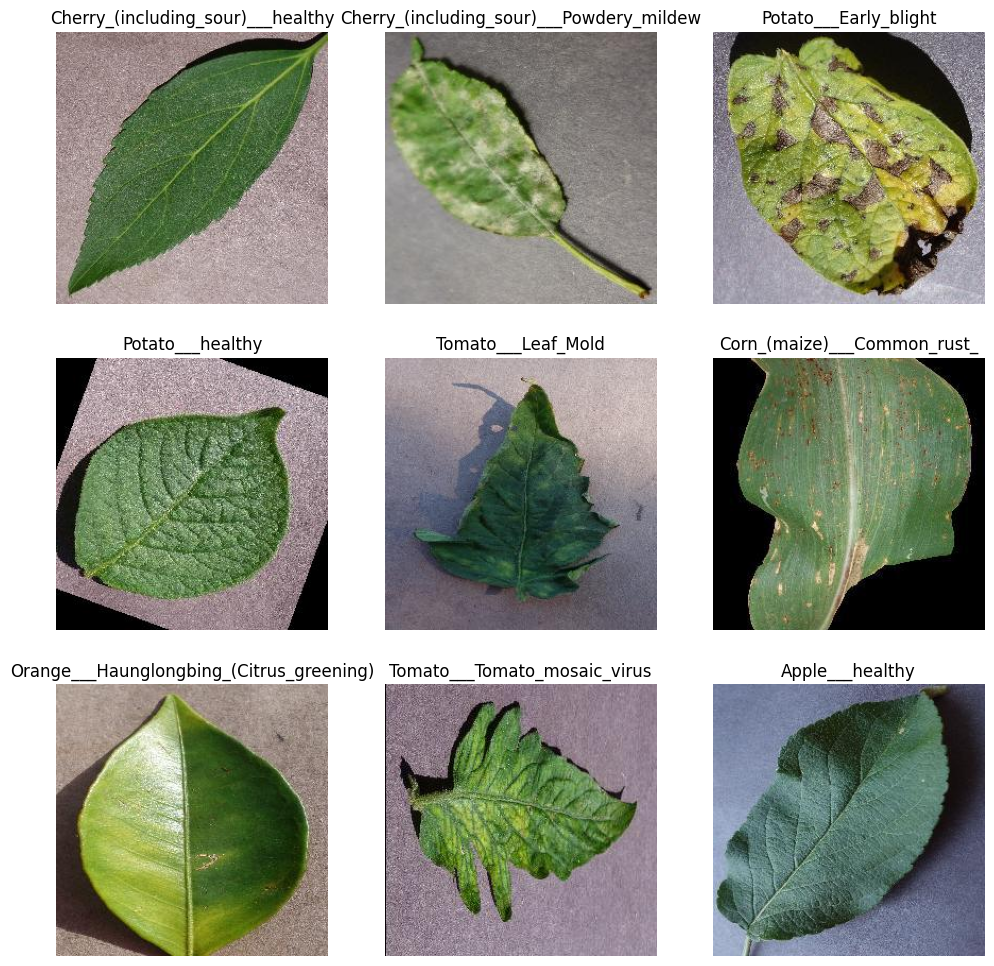

In [13]:
import random

def show_random_images(train_path, classes):
    plt.figure(figsize=(12, 12))
    for i, class_name in enumerate(random.sample(classes, 9)):  # Show 9 random classes
        class_path = os.path.join(train_path, class_name)
        img_name = random.choice(os.listdir(class_path))
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis("off")

    plt.show()

show_random_images(train, list(train_generator.class_indices.keys()))


In [14]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)


In [15]:
target_size = (128, 128)  # OR (256, 256) to compare performance


In [16]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
).flow_from_directory(
    train,
    target_size=(224, 224),
    batch_size=164,
    shuffle=True
)


Found 70295 images belonging to 38 classes.


In [17]:
# Define function to load images
def load_and_preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Decode image
    image = tf.image.resize(image, [224, 224])  # Resize to target size
    image = image / 255.0  # Normalize pixel values (0-1)
    return image, label

# Create dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    image_size=(224, 224),
    batch_size=164,
    shuffle=True
).map(lambda x, y: (tf.image.per_image_standardization(x), y))  # Normalize images

# Enable parallel processing
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

# Check dataset output
for image_batch, label_batch in train_dataset.take(1):
    print(f"Image batch shape: {image_batch.shape}")
    print(f"Label batch shape: {label_batch.shape}")


Found 70295 files belonging to 38 classes.
Image batch shape: (164, 224, 224, 3)
Label batch shape: (164,)


In [18]:
import tensorflow as tf
import numpy as np

def cutmix(images, labels, beta=1.0):
    """
    Applies CutMix augmentation on a batch of images and labels.

    Args:
      images: Tensor of shape [batch_size, height, width, channels]
      labels: Tensor of shape [batch_size, num_classes] (expected as int32, but will be cast to float32)
      beta: Parameter for the Beta distribution.

    Returns:
      new_images: Augmented images
      new_labels: Mixed labels (float32)
    """
    batch_size = tf.shape(images)[0]
    img_height = tf.shape(images)[1]
    img_width = tf.shape(images)[2]

    # Cast labels to float32 for arithmetic operations
    labels = tf.cast(labels, tf.float32)

    # Sample lambda from a Gamma distribution (alternative to Beta)
    lam = tf.cast(tf.random.gamma([], alpha=beta, beta=beta), tf.float32)

    # Determine the size of the cut region based on lambda
    cut_rat = tf.sqrt(1.0 - lam)
    cut_w = tf.cast(img_width, tf.float32) * cut_rat
    cut_h = tf.cast(img_height, tf.float32) * cut_rat

    # Randomly choose the center of the cut region
    cx = tf.random.uniform([], minval=0, maxval=img_width, dtype=tf.int32)
    cy = tf.random.uniform([], minval=0, maxval=img_height, dtype=tf.int32)

    # Compute bounding box coordinates for the cut region
    bbx1 = tf.clip_by_value(cx - tf.cast(cut_w/2, tf.int32), 0, img_width)
    bby1 = tf.clip_by_value(cy - tf.cast(cut_h/2, tf.int32), 0, img_height)
    bbx2 = tf.clip_by_value(cx + tf.cast(cut_w/2, tf.int32), 0, img_width)
    bby2 = tf.clip_by_value(cy + tf.cast(cut_h/2, tf.int32), 0, img_height)

    # Shuffle the batch to get pairing images and labels
    indices = tf.random.shuffle(tf.range(batch_size))
    shuffled_images = tf.gather(images, indices)
    shuffled_labels = tf.gather(labels, indices)

    # Create a mask for the cut region
    x_coords = tf.range(img_width)
    y_coords = tf.range(img_height)
    X, Y = tf.meshgrid(x_coords, y_coords)  # Shape: [img_height, img_width]

    mask = tf.cast(tf.logical_and(tf.logical_and(X >= bbx1, X < bbx2),
                                  tf.logical_and(Y >= bby1, Y < bby2)), tf.float32)
    # Expand mask dimensions to [1, img_height, img_width, 1]
    mask = tf.expand_dims(mask, axis=0)
    mask = tf.expand_dims(mask, axis=-1)
    # Tile mask to match batch size and number of channels (assumed 3)
    mask = tf.tile(mask, [batch_size, 1, 1, 3])

    # Combine the images using the mask
    new_images = images * (1.0 - mask) + shuffled_images * mask

    # Adjust lambda based on the actual replaced area
    area = tf.cast((bbx2 - bbx1) * (bby2 - bby1), tf.float32)
    total_area = tf.cast(img_height * img_width, tf.float32)
    lam_adjusted = 1.0 - area / total_area

    # Mix the labels accordingly
    new_labels = lam_adjusted * labels + (1.0 - lam_adjusted) * shuffled_labels

    return new_images, new_labels

# Example usage in your tf.data pipeline:
train_dataset = train_dataset.map(lambda x, y: cutmix(x, y), num_parallel_calls=tf.data.AUTOTUNE)


In [19]:
import tensorflow as tf
import os
import cv2

def serialize_example(image, label):
    feature = {
        'image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image])),
        'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[label]))
    }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

def save_tfrecord(dataset_path, output_filename):
    writer = tf.io.TFRecordWriter(output_filename)

    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        label = train_generator.class_indices[class_name]

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_bytes = img.tobytes()

            writer.write(serialize_example(img_bytes, label))

    writer.close()
    print(f"TFRecord saved as {output_filename}")

save_tfrecord(train, "plant_disease_train.tfrecord")


TFRecord saved as plant_disease_train.tfrecord


In [22]:
import os
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def create_image_grid(sample_folder, num_images=10):
    images = []
    letters = []
    filenames = []
    # Get the ground truth class name from the folder name
    class_label = os.path.basename(sample_folder)

    # Collect images and assign labels A, B, C, ...
    for idx, img_name in enumerate(os.listdir(sample_folder)[:num_images]):
        img_path = os.path.join(sample_folder, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
            letters.append(chr(65 + idx))  # 65 is ASCII for 'A'
            filenames.append(img_name)

    # Create a matplotlib figure with a grid (2 rows, 5 columns)
    fig, axs = plt.subplots(2, num_images // 2, figsize=(15, 6))
    axs = axs.flatten()
    for ax, img, letter in zip(axs, images, letters):
        # Convert from BGR to RGB for correct colors in matplotlib
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        # Display both the option letter and the ground truth class
        ax.set_title(f"Option {letter}\n(Class: {class_label})")
        ax.axis("off")
    plt.tight_layout()
    return fig, letters, filenames

# Choose a sample folder (here, we use the first class folder from your train directory)
sample_folder = os.path.join(train, os.listdir(train)[0])
fig, letters, filenames = create_image_grid(sample_folder)

# Create an Output widget to hold the figure so it stays visible
out_fig = widgets.Output()
with out_fig:
    plt.show(fig)
    plt.close(fig)

# Create a text input widget for your response
text_input = widgets.Text(
    value='',
    placeholder='Enter labels (e.g., A, C, F) or type "none"',
    description='Incorrect:',
    disabled=False
)

# Display the figure and the text input together in one cell
display(out_fig, text_input)

# Process the input once you enter something
def on_submit(change):
    clear_output(wait=True)
    user_response = change['new']
    print("You indicated the following labels are incorrect:", user_response)

text_input.observe(on_submit, names='value')


Output()

Text(value='', description='Incorrect:', placeholder='Enter labels (e.g., A, C, F) or type "none"')